In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
a, b, c, d, e, f = sm.symbols('a, b, c, d, e, f')

In [3]:
A = me.ReferenceFrame('A')

In [4]:
v = a*A.x + b*A.y + c*A.z
v

In [5]:
v.to_matrix(A)

⎡a⎤
⎢ ⎥
⎢b⎥
⎢ ⎥
⎣c⎦

In [6]:
v.outer(v)

In [7]:
type(v)

sympy.physics.vector.vector.Vector

In [8]:
type(v.outer(v))

sympy.physics.vector.dyadic.Dyadic

In [9]:
Q = v.outer(v)

In [10]:
Q.to_matrix(A)

⎡ 2           ⎤
⎢a    a⋅b  a⋅c⎥
⎢             ⎥
⎢      2      ⎥
⎢a⋅b  b    b⋅c⎥
⎢             ⎥
⎢           2 ⎥
⎣a⋅c  b⋅c  c  ⎦

In [11]:
Q.dot(v)

In [12]:
w = d*A.x + e*A.y + f*A.z
w

In [13]:
v

In [14]:
v.outer(w)

In [15]:
v.outer(w).to_matrix(A)

⎡a⋅d  a⋅e  a⋅f⎤
⎢             ⎥
⎢b⋅d  b⋅e  b⋅f⎥
⎢             ⎥
⎣c⋅d  c⋅e  c⋅f⎦

In [16]:
R = 3*A.x.outer(A.y)
R

In [17]:
Q.cross(w)

In [18]:
B = me.ReferenceFrame('B')

In [19]:
B.orient(A, 'Axis', (5, A.x))

In [20]:
v1 = a*A.x + b*B.y + c*B.z
w1 = d*A.z + e*A.y + f*B.x

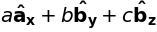

In [21]:
v1

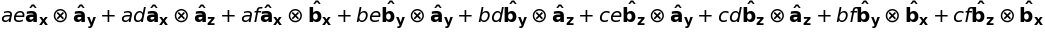

In [22]:
v1.outer(w1)

In [23]:
Q1 = v1.outer(w1)

In [24]:
Q1.express(A)

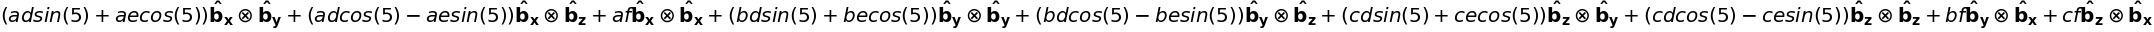

In [25]:
Q1.express(B)

# Inertia and Principal Axes

In [26]:
me.inertia?

Signature: me.inertia(frame, ixx, iyy, izz, ixy=0, iyz=0, izx=0)
Docstring:
Simple way to create inertia Dyadic object.

If you don't know what a Dyadic is, just treat this like the inertia
tensor. Then, do the easy thing and define it in a body-fixed frame.

Parameters

frame : ReferenceFrame
    The frame the inertia is defined in
ixx : Sympifyable
    the xx element in the inertia dyadic
iyy : Sympifyable
    the yy element in the inertia dyadic
izz : Sympifyable
    the zz element in the inertia dyadic
ixy : Sympifyable
    the xy element in the inertia dyadic
iyz : Sympifyable
    the yz element in the inertia dyadic
izx : Sympifyable
    the zx element in the inertia dyadic

Examples

>>> from sympy.physics.mechanics import ReferenceFrame, inertia
>>> N = ReferenceFrame('N')
>>> inertia(N, 1, 2, 3)
(N.x|N.x) + 2*(N.y|N.y) + 3*(N.z|N.z)
File:      /opt/conda/lib/python3.6/site-packages/sympy/physics/mechanics/functions.py
Type:      function


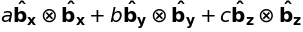

In [27]:
I_S_O = me.inertia(B, a, b, c)
I_S_O

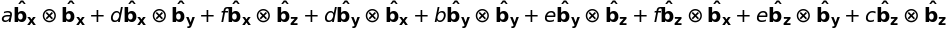

In [28]:
I_S_O = me.inertia(B, a, b, c, ixy=d, iyz=e, izx=f)
I_S_O

In [29]:
I_S_O.to_matrix(B)

⎡a  d  f⎤
⎢       ⎥
⎢d  b  e⎥
⎢       ⎥
⎣f  e  c⎦

In [30]:
I_S_O.express(A)

In [31]:
I_S_O_mat = I_S_O.to_matrix(B)

In [32]:
type(I_S_O_mat)

sympy.matrices.immutable.ImmutableDenseMatrix

In [33]:
I_S_O_mat.eigenvals?

Signature: I_S_O_mat.eigenvals(error_when_incomplete=True, **flags)
Docstring:
Return eigenvalues using the Berkowitz agorithm to compute
the characteristic polynomial.

Parameters

error_when_incomplete : bool, optional
    If it is set to ``True``, it will raise an error if not all
    eigenvalues are computed. This is caused by ``roots`` not returning
    a full list of eigenvalues.

simplify : bool or function, optional
    If it is set to ``True``, it attempts to return the most
    simplified form of expressions returned by applying default
    simplification method in every routine.

    If it is set to ``False``, it will skip simplification in this
    particular routine to save computation resources.

    If a function is passed to, it will attempt to apply
    the particular function as simplification method.

rational : bool, optional
    If it is set to ``True``, every floating point numbers would be
    replaced with rationals before computation. It can solve some
    issu

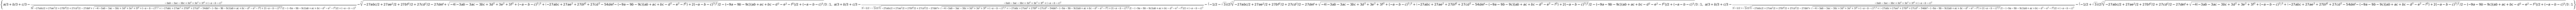

In [34]:
I_S_O_mat.eigenvals()

In [35]:
a, b, c, d, e, f = sm.symbols('a, b, c, d, e, f', real=True)

In [36]:
I_S_O = me.inertia(B, a, b, c, ixy=d, iyz=e, izx=f)

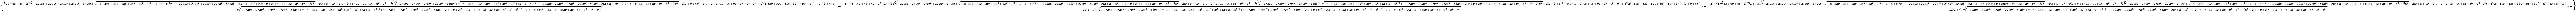

In [37]:
I_S_O.to_matrix(B).eigenvals(simplify=True)

In [38]:
I_S_O = me.inertia(B, 1, 2, 3, ixy=4, iyz=5, izx=6)

In [39]:
evals = I_S_O.to_matrix(B).eigenvals()

In [40]:
type(evals)

dict

In [41]:
list(evals.keys())[0].evalf()

In [42]:
list(evals.keys())[1].evalf()

In [43]:
list(evals.keys())[2].evalf()

In [44]:
I = me.inertia(B, a, b, c)

In [45]:
I.to_matrix(B).eigenvals()

In [46]:
I = me.inertia(B, a, b, c, ixy=d)

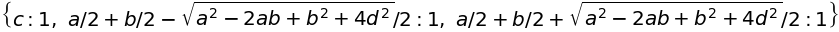

In [47]:
I.to_matrix(B).eigenvals()

In [48]:
I.to_matrix(B).eigenvects()

⎡               ⎛                                        ⎡⎡                -d 
⎢               ⎜                                        ⎢⎢───────────────────
⎢               ⎜           ________________________     ⎢⎢           ________
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜          ╱  2            2      2      ⎢⎢          ╱  2     
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜a   b   ╲╱  a  - 2⋅a⋅b + b  + 4⋅d       ⎢⎢a   b   ╲╱  a  - 2⋅
⎢⎜c, 1, ⎢⎢0⎥⎥⎟, ⎜─ + ─ - ───────────────────────────, 1, ⎢⎢─ - ─ + ───────────
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜2   2                2                  ⎢⎢2   2              
⎢⎝      ⎣⎣1⎦⎦⎠  ⎜                                        ⎢⎢                   
⎢               ⎜                                        ⎢⎢                 1 
⎢               ⎜                                        ⎢⎢                   
⎣               ⎝                                        ⎣⎣                 0 

                ⎤⎤⎞  ⎛                                        ⎡⎡              
────────────────⎥⎥⎟  ⎜                             

In [49]:
me.inertia_of_point_mass?

Signature: me.inertia_of_point_mass(mass, pos_vec, frame)
Docstring:
Inertia dyadic of a point mass relative to point O.

Parameters

mass : Sympifyable
    Mass of the point mass
pos_vec : Vector
    Position from point O to point mass
frame : ReferenceFrame
    Reference frame to express the dyadic in

Examples

>>> from sympy import symbols
>>> from sympy.physics.mechanics import ReferenceFrame, inertia_of_point_mass
>>> N = ReferenceFrame('N')
>>> r, m = symbols('r m')
>>> px = r * N.x
>>> inertia_of_point_mass(m, px, N)
m*r**2*(N.y|N.y) + m*r**2*(N.z|N.z)
File:      /opt/conda/lib/python3.6/site-packages/sympy/physics/mechanics/functions.py
Type:      function


In [50]:
me.partial_velocity?

Signature: me.partial_velocity(vel_vecs, gen_speeds, frame)
Docstring:
Returns a list of partial velocities with respect to the provided
generalized speeds in the given reference frame for each of the supplied
velocity vectors.

The output is a list of lists. The outer list has a number of elements
equal to the number of supplied velocity vectors. The inner lists are, for
each velocity vector, the partial derivatives of that velocity vector with
respect to the generalized speeds supplied.

Parameters

vel_vecs : iterable
    An iterable of velocity vectors (angular or linear).
gen_speeds : iterable
    An iterable of generalized speeds.
frame : ReferenceFrame
    The reference frame that the partial derivatives are going to be taken
    in.

Examples

>>> from sympy.physics.vector import Point, ReferenceFrame
>>> from sympy.physics.vector import dynamicsymbols
>>> from sympy.physics.vector import partial_velocity
>>> u = dynamicsymbols('u')
>>> N = ReferenceFrame('N')
>>> P = Point('P'